### Evaluating and visualizing modifications and cellular component gene ontology (GO) terms associated with algal peptides during degradation experiment

#### Beginning with: GO term abundances from UniPept LCA of tryptic peptides from tryptic and non-tryptic searches of digested protein from all timepoints.

#### Goal: stacked bar plots of PTMs over time for each cellular compartment, for 4 of 8 broad catergories:

- Chloroplast
- Cell membrane
- Nucleus
- Cytoplasm

In [2]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [19]:
# read in the cellular component distributions of 

kacet = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/kacet-trypsin.csv", index_col = 0)
ndeam = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/ndeam-trypsin.csv", index_col = 0)
rmeth = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/rmeth-trypsin.csv", index_col = 0)

#transpose the silico digested diatom GO terms

kacet_T = kacet.transpose()
ndeam_T = ndeam.transpose()
rmeth_T = rmeth.transpose()

kacet.head()

,Day 0 kacet,Day 2 kacet,Day 5 kacet,Day 12 kacet
GO term,,,,
Chloroplast,1.792115,1.261830,2.252252,0.781250
Cell membrane,59.498208,57.097792,59.459459,59.635417
Mitochondria,3.225806,2.208202,1.351351,1.822917
Endoplasmic,0.000000,0.630915,0.450450,0.520833
Golgi,0.716846,1.261830,0.900901,1.041667


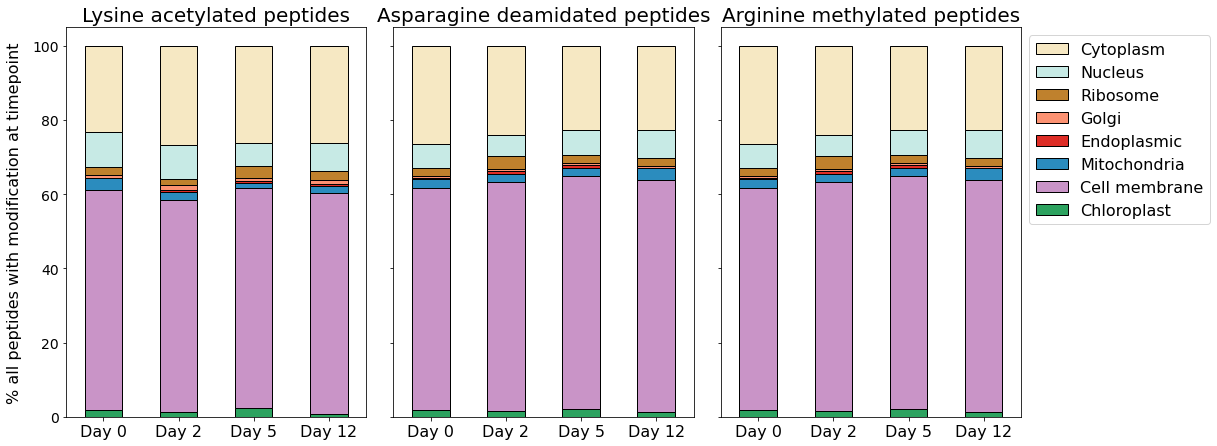

In [32]:
# plot subplots

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(14, 6))

colors = ['#2ca25f', '#c994c7', '#2b8cbe', '#de2d26', '#fc9272', '#bf812d', '#c7eae5', '#f6e8c3']

plt.tight_layout()

labels = ['Day 0', 'Day 2', 'Day 5', 'Day 12']


#  Lysine acetylation

kacet_T.plot(ax = ax1, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax1.set_title('Lysine acetylated peptides', fontsize = 20)

ax1.set_ylabel("% all peptides with modification at timepoint", labelpad=10, fontsize = 16)

ax1.set_xticklabels(labels, rotation = 0, fontsize = 16)

ax1.get_legend().remove()
ax1.tick_params(axis='y', labelsize= 14)

#  Asparagine deamidation

ndeam_T.plot(ax = ax2, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax2.set_title('Asparagine deamidated peptides', fontsize = 20)

ax2.set_ylabel("# peptides", labelpad=10, fontsize = 16)

ax2.set_xticklabels(labels, rotation = 0, fontsize = 16)

ax2.get_legend().remove()
ax2.tick_params(axis='y', labelsize= 14)

          
#  Arginine methylation

rmeth_T.plot(ax = ax3, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax3.set_title('Arginine methylated peptides', fontsize = 20)

ax3.set_xticklabels(labels, rotation = 0, fontsize = 16)


handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1)

ax3.tick_params(axis='y', labelsize= 14);

#plt.savefig('/home/millieginty/Documents/git-repos/2017-etnp/data/thesis-talk/rot-GO-bar_percent.png', bbox_inches='tight', dpi=400)

In [36]:
# read in the cellular component distributions of 

kacet_ud = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/kacet-undig.csv", index_col = 0)
ndeam_ud = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/ndeam-undig.csv", index_col = 0)
rmeth_ud = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/PTM-cellular-compartment/rmeth-undig.csv", index_col = 0)

#transpose the silico digested diatom GO terms

kacet_ud_T = kacet_ud.transpose()
ndeam_ud_T = ndeam_ud.transpose()
rmeth_ud_T = rmeth_ud.transpose()

kacet.head()

,Day 0 kacet,Day 2 kacet,Day 5 kacet,Day 12 kacet
GO term,,,,
Chloroplast,1.792115,1.261830,2.252252,0.781250
Cell membrane,59.498208,57.097792,59.459459,59.635417
Mitochondria,3.225806,2.208202,1.351351,1.822917
Endoplasmic,0.000000,0.630915,0.450450,0.520833
Golgi,0.716846,1.261830,0.900901,1.041667


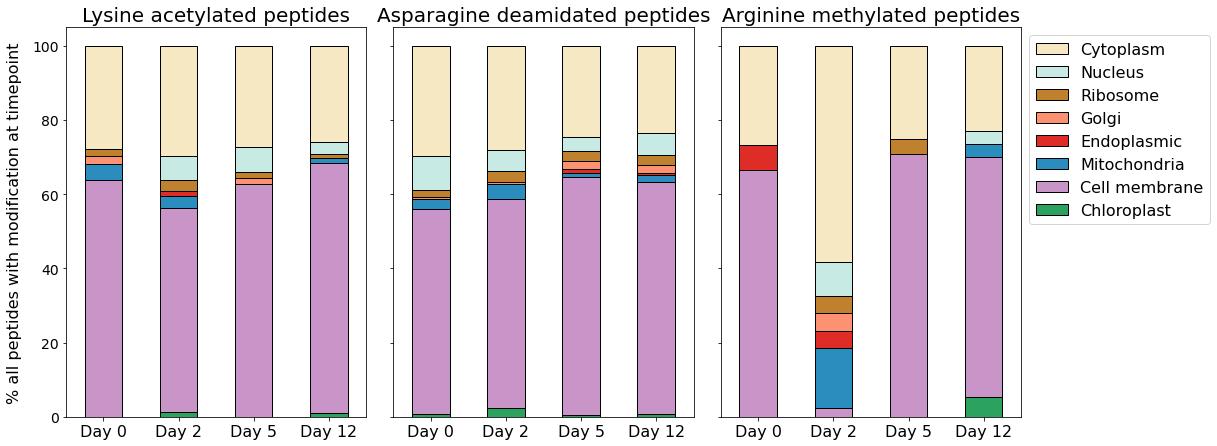

In [37]:
# plot subplots

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(14, 6))

colors = ['#2ca25f', '#c994c7', '#2b8cbe', '#de2d26', '#fc9272', '#bf812d', '#c7eae5', '#f6e8c3']

plt.tight_layout()

labels = ['Day 0', 'Day 2', 'Day 5', 'Day 12']


#  Lysine acetylation

kacet_ud_T.plot(ax = ax1, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax1.set_title('Lysine acetylated peptides', fontsize = 20)

ax1.set_ylabel("% all peptides with modification at timepoint", labelpad=10, fontsize = 16)

ax1.set_xticklabels(labels, rotation = 0, fontsize = 16)

ax1.get_legend().remove()
ax1.tick_params(axis='y', labelsize= 14)

#  Asparagine deamidation

ndeam_ud_T.plot(ax = ax2, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax2.set_title('Asparagine deamidated peptides', fontsize = 20)

ax2.set_ylabel("# peptides", labelpad=10, fontsize = 16)

ax2.set_xticklabels(labels, rotation = 0, fontsize = 16)

ax2.get_legend().remove()
ax2.tick_params(axis='y', labelsize= 14)

          
#  Arginine methylation

rmeth_ud_T.plot(ax = ax3, kind='bar', stacked=True, color = colors, edgecolor = 'black')
ax3.set_title('Arginine methylated peptides', fontsize = 20)

ax3.set_xticklabels(labels, rotation = 0, fontsize = 16)


handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1)

ax3.tick_params(axis='y', labelsize= 14);

#plt.savefig('/home/millieginty/Documents/git-repos/2017-etnp/data/thesis-talk/rot-GO-bar_percent.png', bbox_inches='tight', dpi=400)